In [2]:
import pandas as pd
import os
import sys

import numpy as np
sys.path.append('/Users/ajinich/Dropbox (Aspuru-Guzik Lab)/Quantum/redox/lib/')

import Reaction_Library as RL 

from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import DrawingOptions



from IPython.display import Image, SVG, display


options = DrawingOptions()
options.atomLabelFontSize = 18
# options.atomLabelFontFace = "sansserif"
options.bondLineWidth=2.5
options.includeAtomNumbers=False

testing inside util


In [4]:
path_temp = '../data/data_for_Ben/'
df_rxns = pd.read_csv(os.path.join(path_temp, '21C_G2_G3_redox_rxns.csv'))
df_mols = pd.read_csv(os.path.join(path_temp, '21C_G2_G3_mols.csv'))

In [5]:
df_rxns.head(2)

,rxn_ID,category
0,Z00005 = Z00018,2
1,Z00005 = Z00004,3


In [6]:
df_mols.head(2)

,BA_ID,smiles
0,Z00000,O=CCOP(=O)(O)O
1,Z00001,O=CCO


In [7]:
df_mols['numC'] = df_mols.apply(RL.count_carbons, 1)
df_mols.sort_values('numC', inplace=True)
df_mols.reset_index(inplace=True, drop=True)

In [9]:
df_names_josh = pd.read_csv('/Users/ajinich/Dropbox (Aspuru-Guzik Lab)/Quantum/redox/data/KEGG_DB_datasets/KEGG_names_josh.csv')
names_dict_josh = dict(zip(df_names_josh.KEGG_ID,df_names_josh.name))

In [10]:
def add_names(x, names_dict):
    try:
        comp_name = names_dict[x.KEGG_IDs]
    except:
        comp_name = 'NO_NAME'
        
    return comp_name

def clean_up_mols(df):
    df_no_SFClBr = df[ ~(df.smiles.str.contains('S')) & ~(df.smiles.str.contains('F')) 
                   & ~(df.smiles.str.contains('Cl')) & ~(df.smiles.str.contains('Br'))
                     & ~(df.smiles.str.contains('I')) & ~(df.smiles.str.contains('Zn'))]
    return df_no_SFClBr

In [12]:
# KEGG smiles in canonical form: 
kegg_smiles = '/Users/ajinich/Dropbox (Aspuru-Guzik Lab)/Quantum/redox/data/KEGG_DB_datasets/Kegg_Canonical_Final.json'

# Read json as series and convert to dataframe
ser_kegg = pd.read_json(kegg_smiles, typ='series')
df_kegg = ser_kegg.to_frame('smiles')
df_kegg['KEGG_IDs'] = df_kegg.index
df_kegg.reset_index(level=[], inplace=True)
df_kegg = df_kegg[['KEGG_IDs', 'smiles']]

# Get number of carbons
df_kegg['numC'] = df_kegg.apply(RL.count_carbons, 1)
# df_kegg = df_kegg[df_kegg.numC>0]

# remove generic compounds 
df_kegg = df_kegg[~df_kegg.smiles.str.contains('\*')]
df_kegg = df_kegg[~df_kegg.smiles.str.contains('\#')]
df_kegg = df_kegg[~df_kegg.smiles.str.contains('\.')]

# Add names: 
df_kegg['name'] = df_kegg.apply(add_names, 1, args=[names_dict_josh])

df_kegg.sort_values('numC', inplace=True)
kegg_smiles = df_kegg.smiles.values

Z06000
CC1(C)C2CC(O)C1(C)CC2N


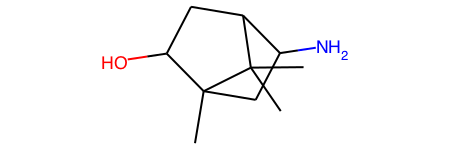

Z05796
O=P(O)(O)OC[C@H]1O[C@@H](n2cnc3cncnc32)[C@H](O)[C@@H]1O


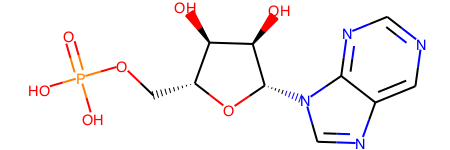

Z05476
O=C1C(=O)C(COC1O)OC1OCC(O)C(=O)C1O


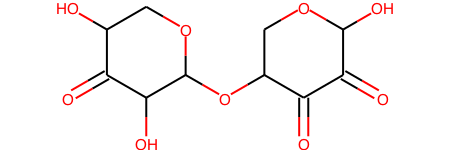

Z05538
Nc1nc(=O)c(OC2OC(CO)C(=O)C(=O)C2O)c(N)[nH]1


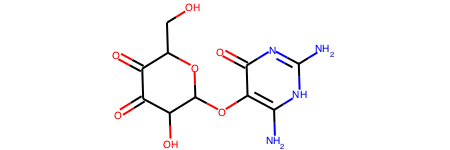

Z05556
Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C1=O


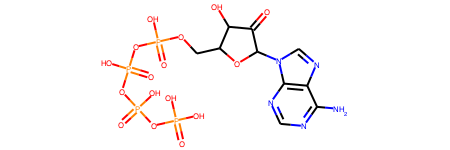

Z05924
O=C(O)c1cc(O)c(CCC(O)C(=O)O)c(=O)[nH]1


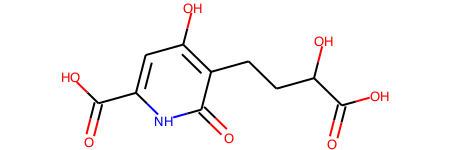

Z05883
C=C(C)C1C(=C)C(O)C=CC1=O


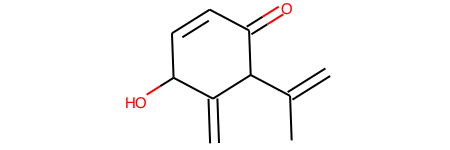

Z05307
CC(C)=C1CCC(C)CC1N


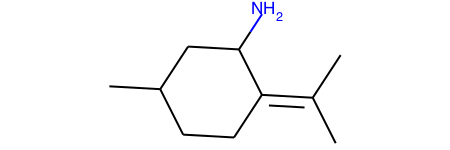

Z05816
C=C(OC1C=CC=C(C(=O)O)C1=O)C(=O)O


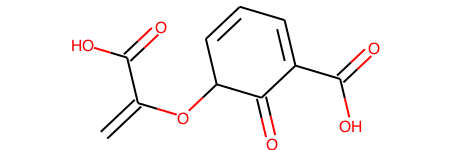

Z05055
C=C(C)[C@H]1C(=C)[C@@H](O)C=C[C@H]1O


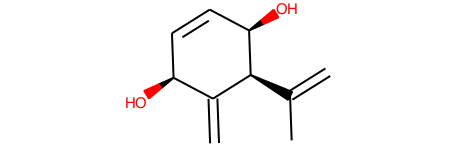

Z05618
Cc1cn(c(=O)nc1N)C1CC(=O)C(C=O)O1


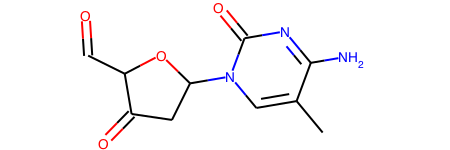

Z05578
CC1(C)C2CCC1(C)C(O)C2N


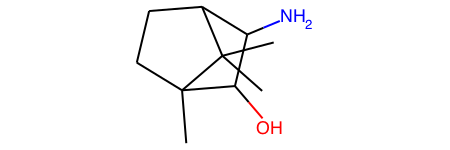

Z05120
Nc1nc2c(ncn2C2OC(COP(=O)(O)OP(=O)(O)O)C(=O)C2O)c(=O)[nH]1


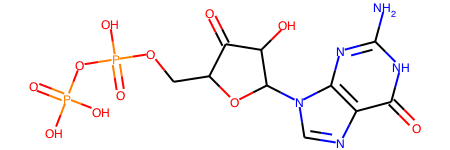

Z05838
Nc1ccc(O)cc1C(=O)CC(N)C(=O)O


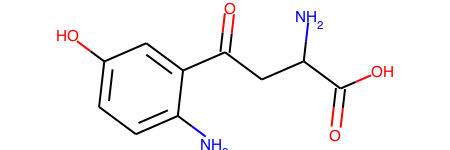

Z05693
NC(CC(=O)NC1OC(C=O)C(=O)C(O)C1=O)C(=O)O


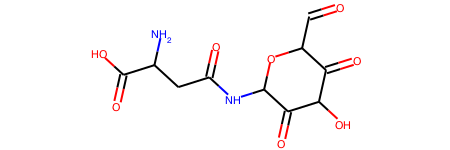

Z04964
NC(=O)OCC(CO)c1ccccc1


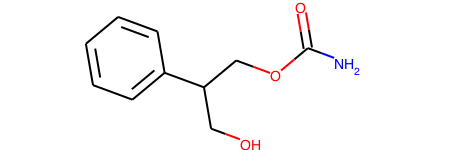

Z05011
O=C(O)C(=O)CCCCCC(=O)C1CO1


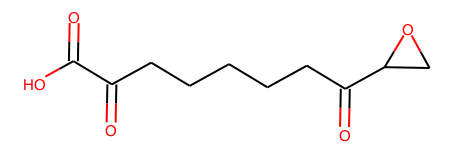

Z05380
CCCCCCCCCC=O


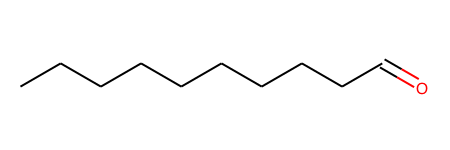

Z05446
CC(C)=CCCC(C)CC=O


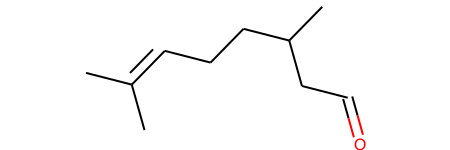

Z05910
O=c1[nH]cnc2c1ncn2C1OC(CO)C(O)C1O


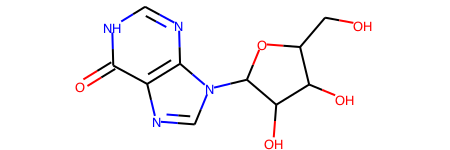

Z05304
O=CC1Cc2ccccc2C1=O


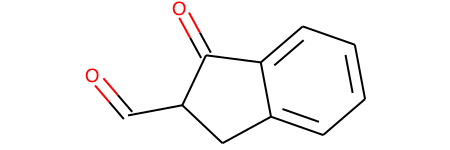

Z05381
NC1C=Cc2ccccc2C1O


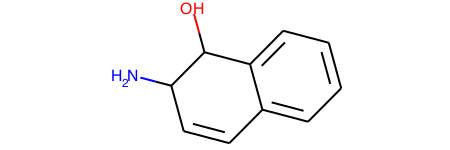

Z05147
Nc1nc(N[C@@H]2O[C@H](COP(=O)(O)O)[C@@H](O)[C@H]2O)c(NC=O)c(=O)[nH]1


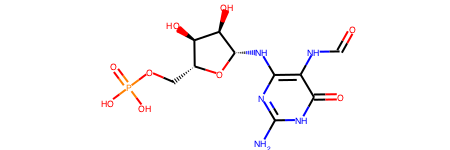

Z05036
O=CCc1c[nH]c2ccc(O)cc12


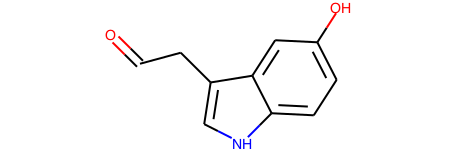

Z05399
NC(CC(=O)NC1OC(CO)C(O)C(=O)C1=O)C(=O)O


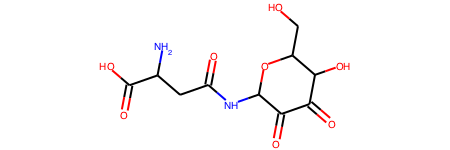

Z05044
C=C(O[C@@H]1C=C(C(=O)O)C=C[C@H]1N)C(=O)O


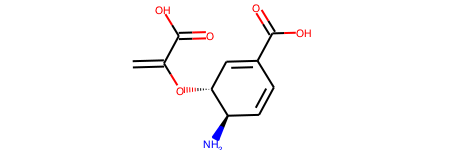

Z05694
NC(CC(=O)NC1OC(C=O)C(O)C(=O)C1O)C(=O)O


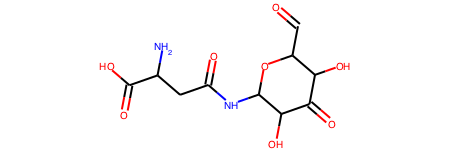

Z05722
Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)O)[C@@H](O)[C@H]1N


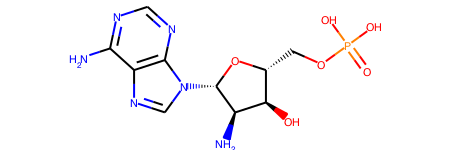

Z05670
Nc1nc2c(ncn2C2CC(=O)C(COP(=O)(O)OP(=O)(O)O)O2)c(=O)[nH]1


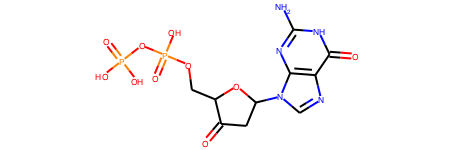

Z05609
COc1cc(O)cc(OC)c1C(C)O


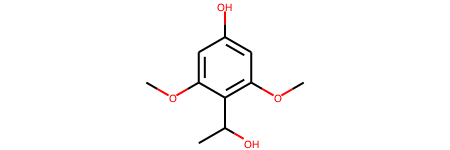

Z05814
Nc1ncnc2c1ncn2C1CC(=O)C(COP(=O)(O)O)O1


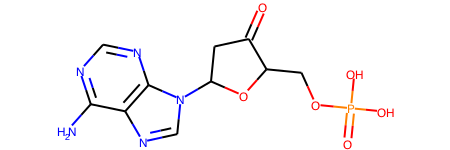

Z05871
C=C(C)[C@@H]1CC=C(C)[C@@H](O)C1


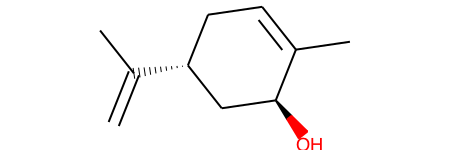

Z05005
O=C(O)Cc1cn(cn1)C1OC(COP(=O)(O)O)C(=O)C1O


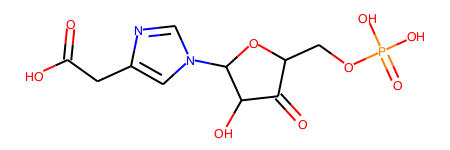

Z05086
NCCC(N)c1cc(O)ccc1NC=O


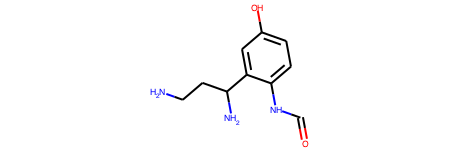

Z05099
CC1=C[C@@H](O)[C@H]2[C@@H](C1=O)C2(C)C


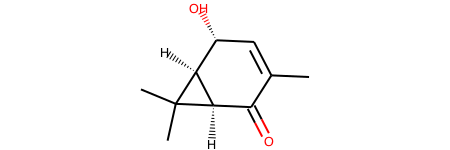

Z05630
O=CC1Cc2ccccc2C1O


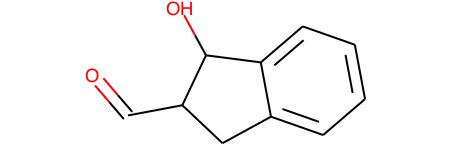

Z05258
O=CC1OC(NC(=O)CC(=O)C(=O)O)C(=O)C(=O)C1O


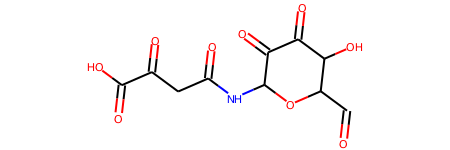

Z05063
NC1CC(O)Cc2cccc(O)c21


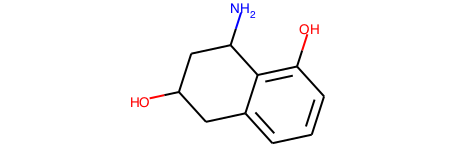

Z05394
O=C1c2cccc(c2C=CC1O)[N+](=O)[O-]


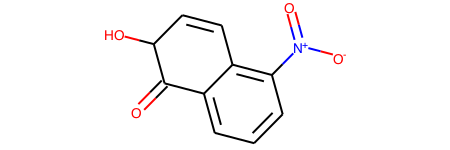

Z05502
Nc1ccc(O)cc1C(O)CC(O)C(=O)O


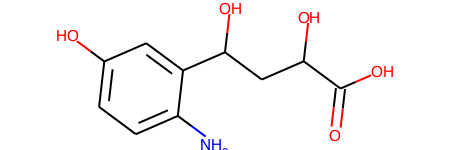

Z05882
O=c1[nH]c(=O)c2[nH]c(=O)n([C@@H]3O[C@H](COP(=O)(O)O)[C@@H](O)[C@H]3O)c2[nH]1


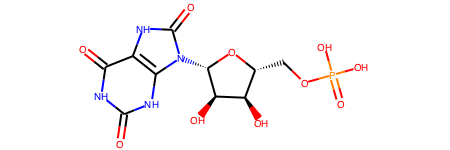

Z05694
NC(CC(=O)NC1OC(C=O)C(O)C(=O)C1O)C(=O)O


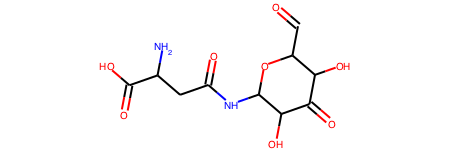

Z05108
CC1=CC(O)C2C(C1O)C2(C)C


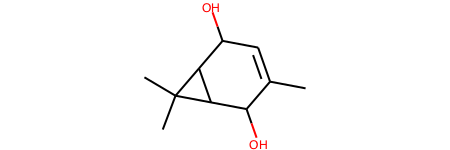

Z05827
O=C1CC(OC1COP(=O)(O)OP(=O)(O)OP(=O)(O)O)n1cnc2c(=O)[nH]c(=O)[nH]c21


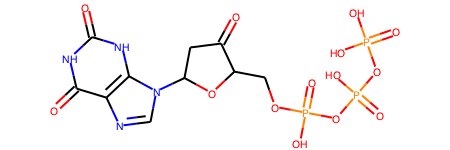

Z05233
NC1C=C(O)C(=O)c2c(O)cccc21


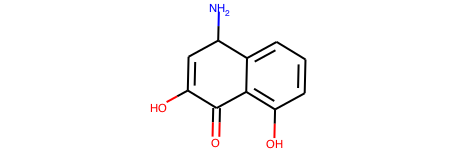

Z05840
O=CC1CCC(O1)n1cnc2c(=O)[nH]cnc21


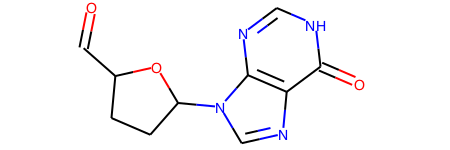

Z05199
CC(C=CC=C(C)CN)=CCN


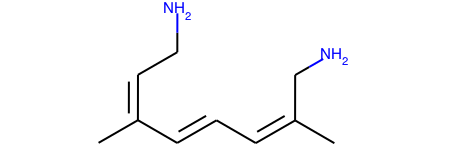

Z05058
NCCCNCCCNCCCC=O


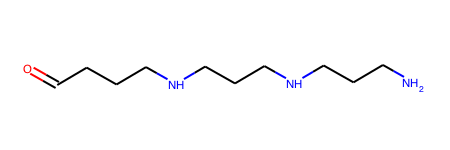

Z05290
Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(=O)C1=O


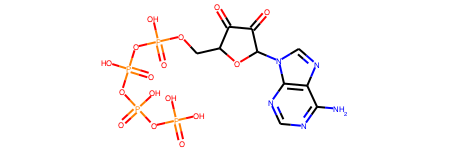

Z05960
CC(C=O)=CCCC(C)=CCN


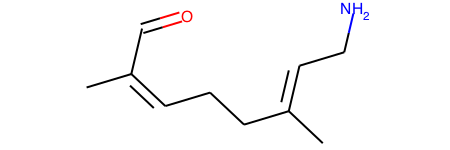

In [24]:
df_mols_nC = df_mols[df_mols.numC == 10]
ind_all = df_mols_nC.index
ind_rand = np.random.choice(ind_all, 50)
for i in ind_rand:
    smi_temp = df_mols_nC.loc[i, 'smiles']
    BA_ID = df_mols_nC.loc[i, 'BA_ID']
    mol = Chem.MolFromSmiles(smi_temp)
    print BA_ID
    print smi_temp
    display(mol)

In [25]:
sub_ID = 'Z05476'
smi_sub = df_mols[df_mols.BA_ID==sub_ID].smiles.values[0]

df_rxns_temp = df_rxns[df_rxns.rxn_ID.str.contains(sub_ID)]

prods_list = []
for i in df_rxns_temp.index:
    rxn_ID = df_rxns_temp.loc[i, "rxn_ID"].split(' = ')
    prod_ID = [mol for mol in rxn_ID if mol!=sub_ID][0]
    smi_prod = df_mols[df_mols.BA_ID==prod_ID].smiles.values[0]
    prods_list.append([prod_ID, smi_prod])

In [26]:
df_rxns_temp

,rxn_ID,category
13843,Z05476 = Z05368,2
13856,Z05476 = Z05496,2
14005,Z05476 = Z05185,2
14131,Z05582 = Z05476,2
14146,Z05589 = Z05476,2


In [27]:
path_temp = '/Users/ajinich/Dropbox (Aspuru-Guzik Lab)/Quantum/redox/misc/fig1_qcml'
counter = 0

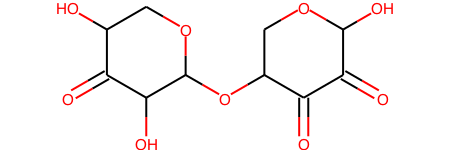

In [30]:
counter = 100
mol = Chem.MolFromSmiles(smi_sub)
# Draw.MolToFile(mol,os.path.join(path_temp, 'root_new.png'),size=(300,300),options=options)
# Draw.MolToFile(mol,os.path.join(path_temp, 'root.svg'),size=(300,300),options=options)
Draw.MolToFile(mol,os.path.join(path_temp, 'root_2_'+str(counter)+'.svg'),size=(300,300),options=options)
mol

Z05368


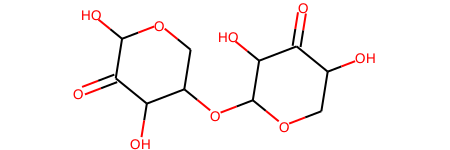

Z05496


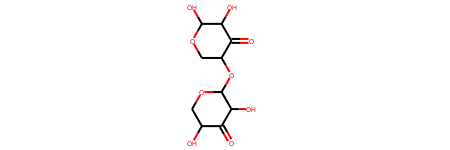

Z05185


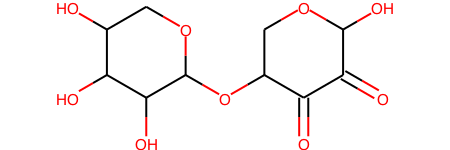

Z05582


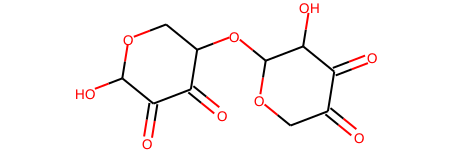

Z05589


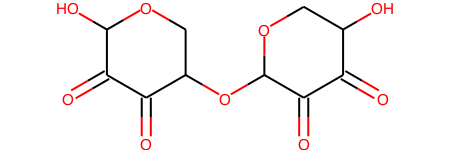

In [29]:
counter = 0
for smi_prod in prods_list:
    mol = Chem.MolFromSmiles(smi_prod[1])
    print smi_prod[0]
    Draw.MolToFile(mol,os.path.join(path_temp, 'root_2_'+str(counter)+'.svg'),size=(300,300),options=options)
    counter += 1
    display(mol)

In [125]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [150]:
import seaborn as sns
cols = sns.color_palette("Set1",9)

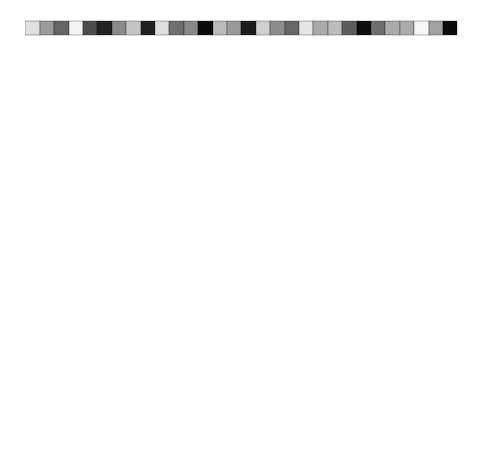

In [168]:
fig = plt.figure(figsize = (8, 8))
ax = plt.subplot(111)
ax.set_facecolor('white')
for i in range(30):
    rand_num = np.random.random()
    fc = (rand_num, rand_num, rand_num)
    rect = mpatches.Rectangle((i, 29), 1, 1, ec='k', fc=fc)
    ax.add_artist(rect)
plt.xlim(0, 31)
plt.ylim(0, 31)
plt.axis('off')

plt.savefig(os.path.join(path_temp, 'fp_1_bw.png'), dpi=200)

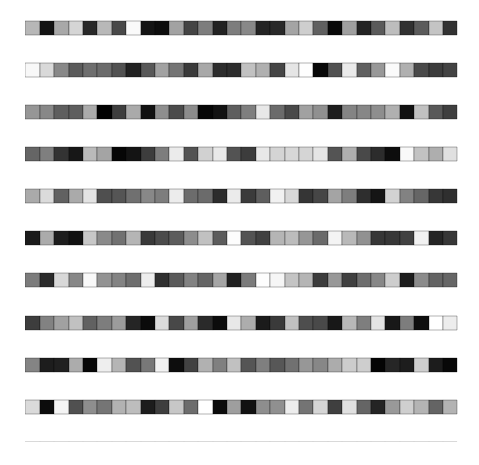

In [169]:
fig = plt.figure(figsize = (8, 8))
ax = plt.subplot(111)
ax.set_facecolor('white')
for j in range(15):
    for i in range(30):
        rand_num = np.random.random()
        fc = (rand_num, rand_num, rand_num)
        rect = mpatches.Rectangle((i, 29-3*j), 1, 1, ec='k', fc=fc)
        ax.add_artist(rect)
plt.xlim(0, 31)
plt.ylim(0, 31)
plt.axis('off')

plt.savefig(os.path.join(path_temp, 'fp_many_bw.png'), dpi=300)